<a href="https://colab.research.google.com/github/shree180103/nn_classification/blob/main/nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples=1000
#create circles

X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
df=pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':y})
df

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df['label'].value_counts()

,count
label,
1,500
0,500


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

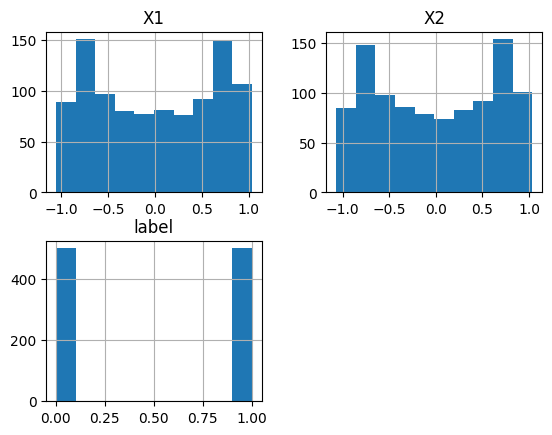

In [8]:
df.hist()

In [9]:
df.corr()

,X1,X2,label
X1,1.000000,-0.001138,-0.000765
X2,-0.001138,1.000000,0.000183
label,-0.000765,0.000183,1.000000


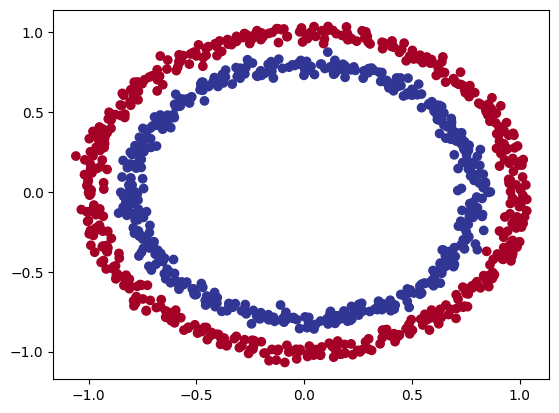

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [11]:
X.shape,y.shape

((1000, 2), (1000,))

#turn the data into tensors

In [12]:
x=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [13]:
x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

# building a model

In [15]:
from torch import nn

class CircleModel(nn.Module):
   def __init__(self):
    super().__init__()
    # create 2 linear layers
    self.layer1=nn.Linear(in_features=2,out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)

    def foward(self,x):
      return self.layer2(self.layer1(x)) # x -> layer1 -> layer2 -> output


In [16]:
model=CircleModel()
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.0709,  0.5638],
                      [-0.4768, -0.6748],
                      [ 0.6187,  0.2815],
                      [ 0.2364, -0.4259],
                      [-0.2110,  0.3783]])),
             ('layer1.bias',
              tensor([-0.4309, -0.6344,  0.1416, -0.5051,  0.2217])),
             ('layer2.weight',
              tensor([[-0.1122, -0.1615, -0.0349,  0.3314, -0.0175]])),
             ('layer2.bias', tensor([-0.0349]))])

In [17]:
#lets replicate the model about using nn.sequential
model=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0834,  0.2811],
                      [-0.3457, -0.2106],
                      [-0.1936, -0.0653],
                      [ 0.5135, -0.5618],
                      [-0.4536, -0.0959]])),
             ('0.bias', tensor([ 0.3204,  0.1178, -0.6265,  0.6995, -0.6509])),
             ('1.weight',
              tensor([[-0.1939, -0.2677,  0.2469,  0.0640,  0.0038]])),
             ('1.bias', tensor([-0.3187]))])

In [19]:
#making predictons
with torch.inference_mode():
  untrained_preds=model(x_test)
untrained_preds[:5]

tensor([[-0.5817],
        [-0.5725],
        [-0.5508],
        [-0.5907],
        [-0.4632]])

In [20]:
loss_fn=nn.BCEWithLogitsLoss() # has sigmoid activation built in to have more accurate computation  same as tenserflow expects logits as inputs
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [21]:
# calculte accuracy

def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc


### training our model

In [22]:
model.eval()
with torch.inference_mode():
  y_logits=model(x_test)[:5]

y_logits

tensor([[-0.5817],
        [-0.5725],
        [-0.5508],
        [-0.5907],
        [-0.4632]])

In [23]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3585],
        [0.3607],
        [0.3657],
        [0.3565],
        [0.3862]])

In [24]:
y_preds=torch.round(y_pred_probs)

In [25]:
y_pred_labels=torch.round(torch.sigmoid(model(x_test)[:5]))
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [26]:
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [27]:
# building a training and testing loops

torch.manual_seed(42)
epochs=100

for epoch in range(epochs):

  # foward pass
  y_logists=model(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logists))

  #calculate loss
  # loss=loss_fn(torch.sigmoid(y_logits),y_train)   # nn.BCEloss expects prediction probs as input
  loss=loss_fn(y_pred,y_train) # nn.BCEWithlogitloss expects raw logits as input
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ###testing
  model.eval() #turns of train mode settings
  with torch.inference_mode():
    test_logits=model(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10==0:
    print(f"epoch: {epoch} | loss: {loss} , acc: {acc:.2f}% | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")







epoch: 0 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 10 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 20 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 30 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 40 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 50 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 60 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 70 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 80 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%
epoch: 90 | loss: 0.6931473016738892 , acc: 50.00% | test loss: 0.72739 , test acc:50.00%


In [28]:
from urllib import request
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper functions already exists")
else:
  print("downloading helper functions")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions,plot_decision_boundary


downloading helper functions


Text(0.5, 1.0, 'test')

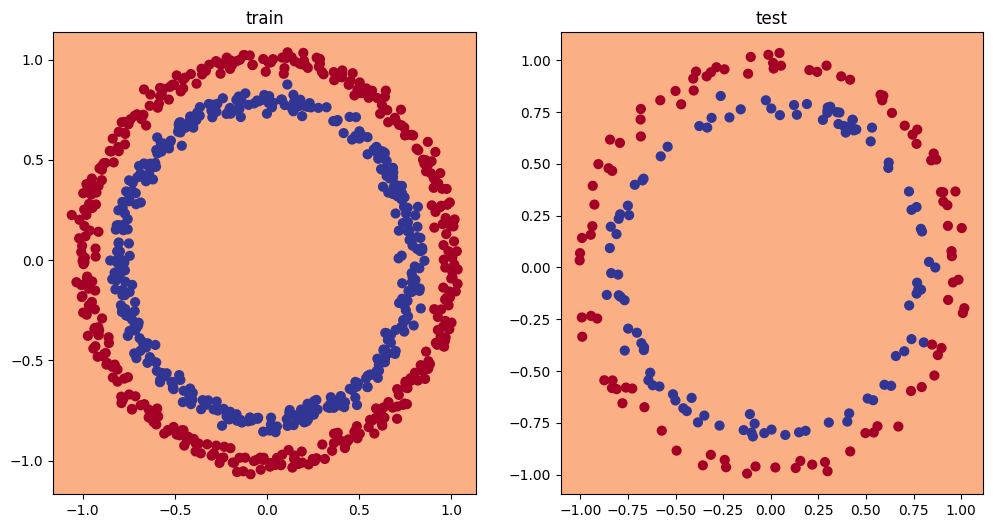

In [29]:
#plot descion boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model,x_train,y_train)
plt.title("train")
plt.subplot(1,2,2)
plot_decision_boundary(model,x_test,y_test)
plt.title("test")


# improving our model

In [30]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z=self.layer1(x)
    # z=self.layer2(z)
    # z=self.layer3(z)
    return self.layer3(self.layer2(self.layer1(x))) # this is the above code in # but in one line to speed up process

model1=CircleModelV1()
model1


CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
model1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [32]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [33]:
torch.manual_seed(42)

epochs=1000

for epoch in range(epochs):
  model.train()
  # foward prop
  y_logists=model1(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logists))

  # calculate loss
  loss=loss_fn(y_logists,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## training
  model1.eval() #turns of train mode settings
  with torch.inference_mode():
    test_logits=model1(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 100==0:
    print(f"epoch: {epoch} | loss: {loss} , acc: {acc:.2f}% | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")





epoch: 0 | loss: 0.6939550638198853 , acc: 50.88% | test loss: 0.69261 , test acc:51.00%
epoch: 100 | loss: 0.6930477619171143 , acc: 50.38% | test loss: 0.69379 , test acc:48.00%
epoch: 200 | loss: 0.692986011505127 , acc: 51.12% | test loss: 0.69437 , test acc:46.00%
epoch: 300 | loss: 0.6929805278778076 , acc: 51.62% | test loss: 0.69458 , test acc:45.00%
epoch: 400 | loss: 0.6929798722267151 , acc: 51.12% | test loss: 0.69465 , test acc:46.00%
epoch: 500 | loss: 0.6929798722267151 , acc: 51.00% | test loss: 0.69467 , test acc:46.00%
epoch: 600 | loss: 0.6929798722267151 , acc: 51.00% | test loss: 0.69468 , test acc:46.00%
epoch: 700 | loss: 0.6929798722267151 , acc: 51.00% | test loss: 0.69468 , test acc:46.00%
epoch: 800 | loss: 0.6929798722267151 , acc: 51.00% | test loss: 0.69468 , test acc:46.00%
epoch: 900 | loss: 0.6929798126220703 , acc: 51.00% | test loss: 0.69468 , test acc:46.00%


### intoducing non linearity


In [34]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
      return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model=CircleModelV2()
model

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [35]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [36]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [37]:
torch.manual_seed(42)
epochs=1000

for epoch in range(1000):

  model.train()

  # foward pass
  y_logists=model(x_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logists))

  loss=loss_fn(y_logists,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

   ## training
  model.eval() #turns of train mode settings
  with torch.inference_mode():
    test_logits=model(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 100==0:
    print(f"epoch: {epoch} | loss: {loss} , acc: {acc:.2f}% | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")





epoch: 0 | loss: 0.6929463148117065 , acc: 50.00% | test loss: 0.69319 , test acc:50.00%
epoch: 100 | loss: 0.6911528706550598 , acc: 52.88% | test loss: 0.69102 , test acc:52.50%
epoch: 200 | loss: 0.6897743940353394 , acc: 53.37% | test loss: 0.68940 , test acc:55.00%
epoch: 300 | loss: 0.687949538230896 , acc: 53.00% | test loss: 0.68723 , test acc:56.00%
epoch: 400 | loss: 0.6851678490638733 , acc: 52.75% | test loss: 0.68411 , test acc:56.50%
epoch: 500 | loss: 0.6810224652290344 , acc: 52.75% | test loss: 0.67941 , test acc:56.50%
epoch: 600 | loss: 0.675148606300354 , acc: 54.50% | test loss: 0.67285 , test acc:56.00%
epoch: 700 | loss: 0.6665886044502258 , acc: 58.38% | test loss: 0.66322 , test acc:59.00%
epoch: 800 | loss: 0.6515955328941345 , acc: 64.00% | test loss: 0.64757 , test acc:67.50%
epoch: 900 | loss: 0.6236233711242676 , acc: 74.00% | test loss: 0.62145 , test acc:79.00%


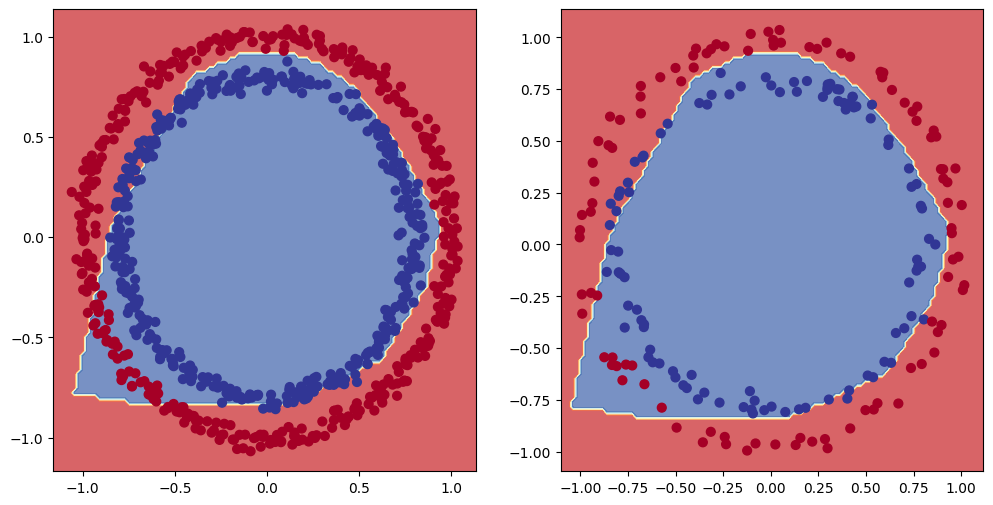

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model,x_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model,x_test,y_test)


### multiclass classification problem

In [39]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# make blobs data set allows u to create ur own data by selcting no. of features and categories

NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

x_blob,y_blob=make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)

x_blob[:5],y_blob[:5]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1]))

In [40]:
x_blob.shape,y_blob.shape

((1000, 2), (1000,))

In [41]:
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

x_blob[:5],y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_blob,y_blob,test_size=0.2,random_state=42)


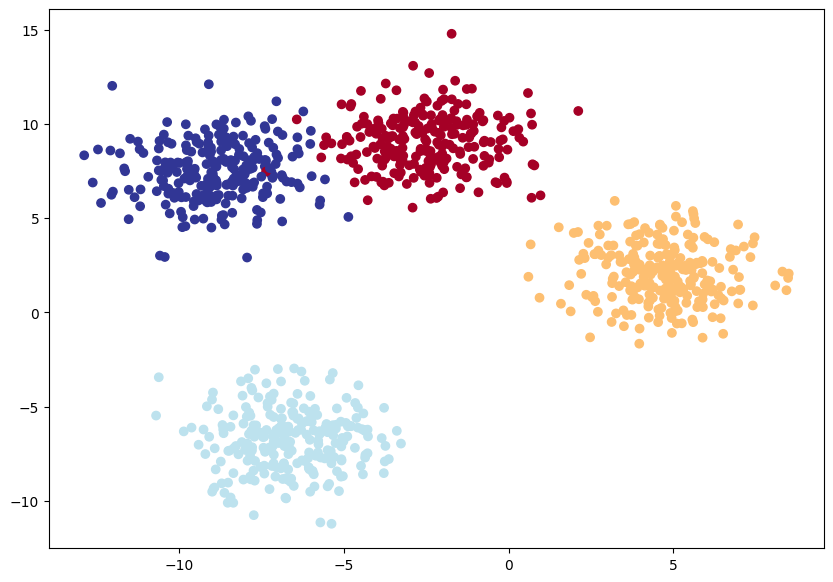

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [44]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)

    )

  def forward(self,x):
    return self.linear_layer_stack(x)


model=BlobModel(input_features=2,output_features=4,hidden_units=8)
model



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [45]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layer_stack.1.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.276

In [46]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [47]:
model.eval()
with torch.inference_mode():
  y_logits=model(x_test)
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [48]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951],
        [0.2788, 0.0088, 0.2893, 0.4232],
        [0.3246, 0.1261, 0.4545, 0.0948],
        [0.2229, 0.0443, 0.1867, 0.5461],
        [0.3447, 0.0368, 0.5269, 0.0917],
        [0.2145, 0.0510, 0.1752, 0.5593]])

In [49]:
# convert pred_probs to pred_labels

y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [50]:
y_test


tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### creating a training and testing loop

In [51]:
from os import access
torch.manual_seed(42)
epochs=100

for epoch in range(epochs):
  model.train()

  # forward
  y_logits=model(x_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  # loss calulation
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #### training
  model.eval() #turns of train mode settings
  with torch.inference_mode():
    test_logits=model(x_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10==0:
    print(f"epoch: {epoch} | loss: {loss} , acc: {acc:.2f}% | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")


epoch: 0 | loss: 1.0432370901107788 , acc: 65.50% | test loss: 0.57861 , test acc:95.50%
epoch: 10 | loss: 0.14397816359996796 , acc: 99.12% | test loss: 0.13037 , test acc:99.00%
epoch: 20 | loss: 0.08061709254980087 , acc: 99.12% | test loss: 0.07216 , test acc:99.50%
epoch: 30 | loss: 0.05923593044281006 , acc: 99.12% | test loss: 0.05133 , test acc:99.50%
epoch: 40 | loss: 0.048919178545475006 , acc: 99.00% | test loss: 0.04098 , test acc:99.50%
epoch: 50 | loss: 0.042949628084897995 , acc: 99.00% | test loss: 0.03486 , test acc:99.50%
epoch: 60 | loss: 0.03909869119524956 , acc: 99.00% | test loss: 0.03083 , test acc:99.50%
epoch: 70 | loss: 0.03642875701189041 , acc: 99.00% | test loss: 0.02799 , test acc:99.50%
epoch: 80 | loss: 0.034480322152376175 , acc: 99.00% | test loss: 0.02587 , test acc:99.50%
epoch: 90 | loss: 0.033002883195877075 , acc: 99.12% | test loss: 0.02423 , test acc:99.50%


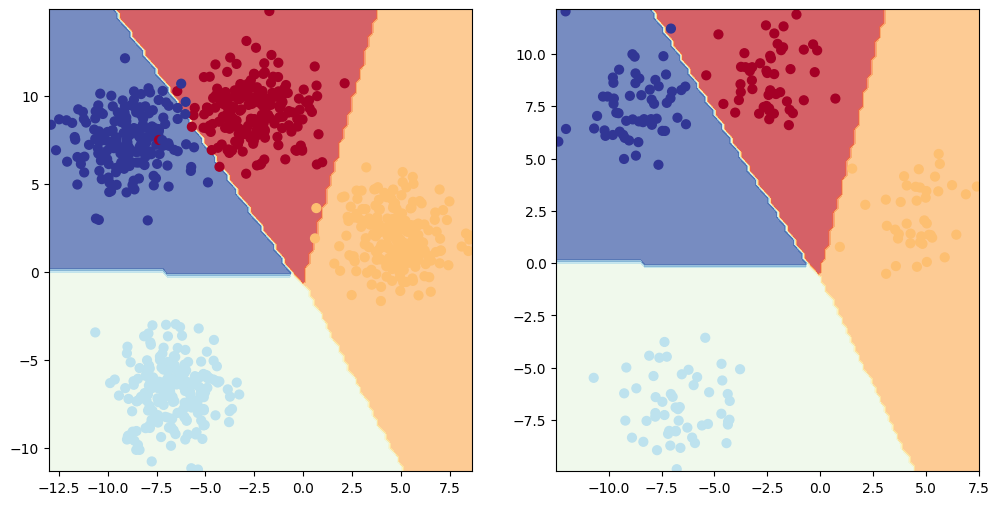

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model,x_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model,x_test,y_test)

### a few more classification metrics

In [53]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 5.4 MB/s eta 0:00:00


In [54]:
model.eval()
with torch.inference_mode():
  y_logits=model(x_test)

y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1)


In [55]:
from torchmetrics import Accuracy,F1Score,Precision,Recall

accuracy=Accuracy(task="multiclass",num_classes=4)
f1_score=F1Score(task="multiclass",num_classes=4)
precision=Precision(task="multiclass",num_classes=4)
recall=Recall(task="multiclass",num_classes=4)

accuracy(y_preds,y_test),precision(y_preds,y_test),recall(y_preds,y_test)

(tensor(0.9950), tensor(0.9950), tensor(0.9950))

# excersise

In [66]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

NUM_FEATURES=2
NUM_CLASSES=2
RANDOM_SEED=42

x_moon,y_moon=make_moons(n_samples=1000,noise=0.05,random_state=RANDOM_SEED)

x_moon[:5],y_moon[:5]
x_moon=torch.from_numpy(x_moon).type(torch.float)
y_moon=torch.from_numpy(y_moon).type(torch.float)
x_moon[:5],y_moon[:5]

(tensor([[-0.0214,  0.4062],
         [ 0.9767, -0.4583],
         [ 0.9041, -0.3765],
         [ 0.3774, -0.3970],
         [-0.8419,  0.5306]]),
 tensor([1., 1., 1., 1., 0.]))

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_moon,y_moon,test_size=0.2,random_state=42)

In [74]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [95]:
class MoonModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)

    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model=MoonModel(input_features=2,output_features=1,hidden_units=8)
model


MoonModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [96]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.276

In [97]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [98]:
torch.manual_seed(42)
epochs=1000

for epoch in range(epochs):
  model.train()

  y_logits=model(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #### training
  model.eval() #turns of train mode settings
  with torch.inference_mode():
    test_logits=model(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 100==0:
    print(f"epoch: {epoch} | loss: {loss} , acc: {acc:.2f}% | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")

epoch: 0 | loss: 0.7119889855384827 , acc: 50.00% | test loss: 0.70546 , test acc:50.00%
epoch: 100 | loss: 0.3622228503227234 , acc: 84.88% | test loss: 0.37499 , test acc:83.50%
epoch: 200 | loss: 0.24143630266189575 , acc: 88.50% | test loss: 0.24049 , test acc:90.00%
epoch: 300 | loss: 0.221677765250206 , acc: 89.50% | test loss: 0.21596 , test acc:90.50%
epoch: 400 | loss: 0.20241662859916687 , acc: 90.62% | test loss: 0.19498 , test acc:91.50%
epoch: 500 | loss: 0.1721327155828476 , acc: 92.38% | test loss: 0.16379 , test acc:93.50%
epoch: 600 | loss: 0.13006679713726044 , acc: 95.00% | test loss: 0.12163 , test acc:95.50%
epoch: 700 | loss: 0.08702563494443893 , acc: 97.62% | test loss: 0.07933 , test acc:98.50%
epoch: 800 | loss: 0.055952783674001694 , acc: 99.12% | test loss: 0.04967 , test acc:99.50%
epoch: 900 | loss: 0.03755785524845123 , acc: 99.62% | test loss: 0.03257 , test acc:100.00%


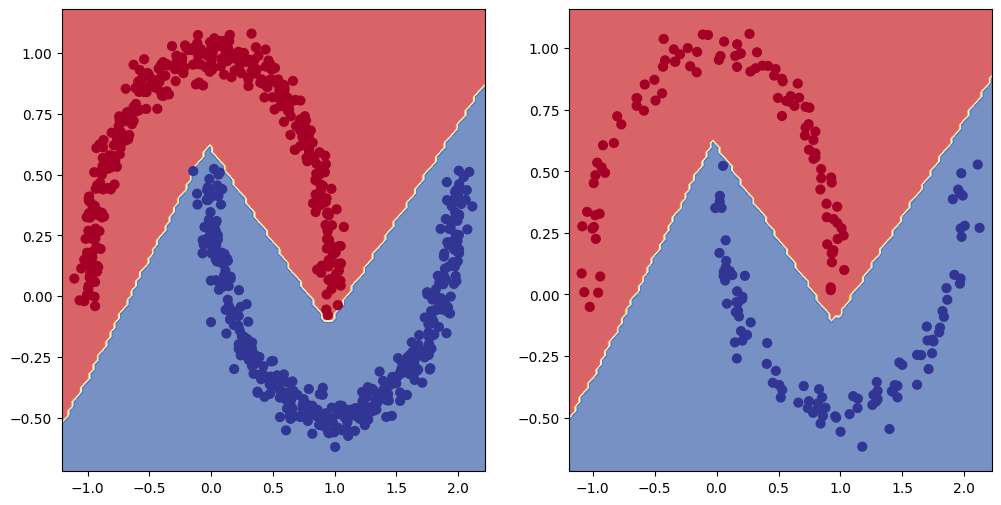

In [99]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model,x_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model,x_test,y_test)

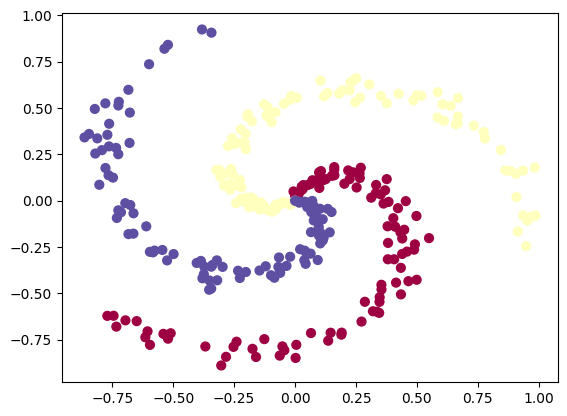

In [126]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [128]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [120]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.LongTensor)
X[:5],y[:5]

(tensor([[ 0.0000,  0.0000],
         [-0.0021,  0.0099],
         [-0.0005,  0.0202],
         [ 0.0021,  0.0302],
         [ 0.0003,  0.0404]]),
 tensor([0, 0, 0, 0, 0]))

In [121]:
X.shape,y.shape

(torch.Size([300, 2]), torch.Size([300]))

In [122]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [135]:
class spiralModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=64):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)

    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model=spiralModel(input_features=2,output_features=3,hidden_units=64)
model

spiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [136]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [137]:
torch.manual_seed(42)
epochs=1000

for epoch in range(epochs):
  model.train()

  y_logits=model(x_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #### training
  model.eval() #turns of train mode settings
  with torch.inference_mode():
    test_logits=model(x_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 100==0:
    print(f"epoch: {epoch} | loss: {loss} , acc: {acc:.2f}% | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")



epoch: 0 | loss: 1.09527587890625 , acc: 32.50% | test loss: 1.09683 , test acc:38.33%
epoch: 100 | loss: 0.7299329042434692 , acc: 54.58% | test loss: 0.77027 , test acc:50.00%
epoch: 200 | loss: 0.6324873566627502 , acc: 58.33% | test loss: 0.69203 , test acc:53.33%
epoch: 300 | loss: 0.5243109464645386 , acc: 69.58% | test loss: 0.58819 , test acc:63.33%
epoch: 400 | loss: 0.4021133482456207 , acc: 80.00% | test loss: 0.46520 , test acc:80.00%
epoch: 500 | loss: 0.30210384726524353 , acc: 86.25% | test loss: 0.36482 , test acc:86.67%
epoch: 600 | loss: 0.23528316617012024 , acc: 92.08% | test loss: 0.29920 , test acc:88.33%
epoch: 700 | loss: 0.19121117889881134 , acc: 92.50% | test loss: 0.25847 , test acc:91.67%
epoch: 800 | loss: 0.15960164368152618 , acc: 94.58% | test loss: 0.23079 , test acc:95.00%
epoch: 900 | loss: 0.13606812059879303 , acc: 96.25% | test loss: 0.20935 , test acc:96.67%


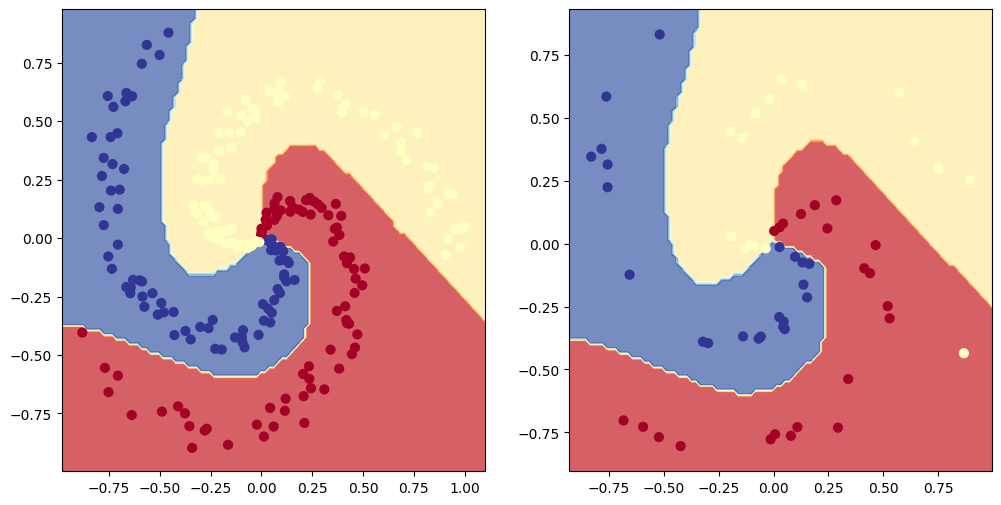

In [138]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model,x_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model,x_test,y_test)